In [65]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [66]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [67]:
len(x_train)

60000

In [68]:
x_train[0].shape

(28, 28)

In [69]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

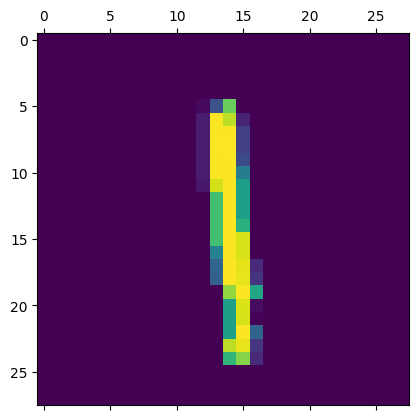

In [70]:
plt.matshow(x_train[8])

In [71]:
y_train[8]

1

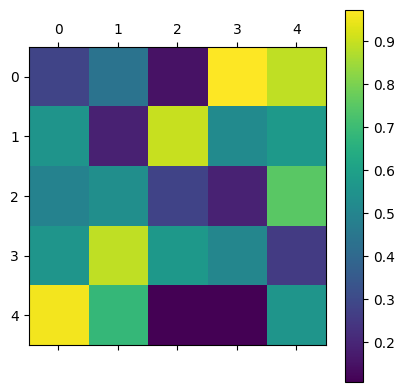

In [72]:

matrix = np.random.rand(5, 5)  # Random 5x5 matrix

plt.matshow(matrix, cmap='viridis')  # Display matrix with a colormap
plt.colorbar()  # Show color scale
plt.show()


In [73]:
x_train=x_train/255
x_test=x_test/255

In [74]:
x_train_flatten=x_train.reshape(len(x_train),28*28)

In [75]:
x_test_flatten=x_test.reshape(len(x_test),28*28)

In [76]:
x_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# LOSS Function
A loss function in machine learning and deep learning measures how well a model's predictions match the actual target values. It quantifies the difference between the predicted output and the ground truth, guiding the model's optimization process. The goal is to minimize this loss to improve accuracy.



### 🔹 **For Regression (Continuous Output)**
| Loss Function         | When to Use | Pros | Cons |
|----------------------|------------|------|------|
| **MSE (Mean Squared Error)** | General regression problems | Penalizes large errors more, smooth gradients | Sensitive to outliers |
| **MAE (Mean Absolute Error)** | When outliers are present | Less sensitive to outliers | Can lead to slower convergence |
| **Huber Loss** | Mix of MSE & MAE, handles outliers well | Balances sensitivity & robustness | Needs a threshold parameter (δ) |

**Best Choice?**
- Use **MSE** if large errors matter more.
- Use **MAE** if your data has many outliers.
- Use **Huber Loss** if you need a balance.

---

### 🔹 **For Classification**
| Loss Function | When to Use | Pros | Cons |
|--------------|------------|------|------|
| **Binary Cross-Entropy** | Binary classification (e.g., spam detection) | Works well with sigmoid activation | Requires probability outputs |
| **Categorical Cross-Entropy** | Multi-class classification (one-hot labels) | Best for multi-class problems | Needs one-hot encoding |
| **Sparse Categorical Cross-Entropy** | Multi-class classification (integer labels) | Avoids one-hot encoding | Labels must be integers |
| **Hinge Loss** | SVM-based models | Good for margin-based classification | Not common in neural networks |

**Best Choice?**
- Use **Binary Cross-Entropy** for binary classification.
- Use **Categorical Cross-Entropy** for multi-class classification.
- Use **Sparse Categorical Cross-Entropy** if your labels are **not one-hot encoded**.

In [77]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

model.fit(x_train_flatten,y_train,epochs=5)


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8150 - loss: 0.7176
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9127 - loss: 0.3093
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9220 - loss: 0.2777
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9245 - loss: 0.2701
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9260 - loss: 0.2683


In [78]:
model.evaluate(x_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.9178 - loss: 0.2994


[0.26393747329711914, 0.9273999929428101]

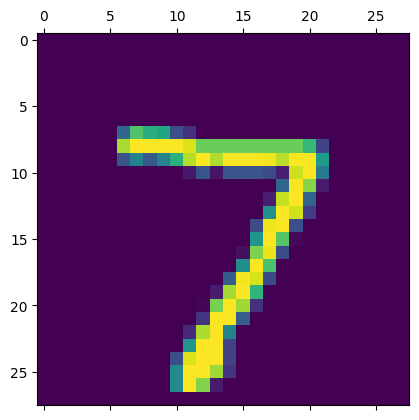

In [79]:
plt.matshow(x_test[0])

In [80]:
y_predict=model.predict(x_test_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [81]:
y_predict[0]

array([1.4277665e-02, 3.4968633e-07, 8.1983432e-02, 9.4062388e-01,
       2.2027302e-03, 1.0436513e-01, 1.0466692e-06, 9.9986398e-01,
       1.0703563e-01, 6.6435766e-01], dtype=float32)

In [82]:
np.argmax(y_predict[0])

7

In [85]:
y_predict_labels=[np.argmax(i) for i in y_predict]
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [87]:
import tensorflow as tf

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predict_labels)


In [88]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    4,    2,    0,    5,    6,    3,    3,    1],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   4,    8,  932,   12,    8,    6,   10,   12,   37,    3],
       [   3,    0,   27,  913,    0,   23,    2,   12,   22,    8],
       [   1,    1,    4,    0,  917,    0,   11,    4,   10,   34],
       [   7,    2,    4,   37,    9,  775,   13,    6,   34,    5],
       [   9,    3,    7,    1,    7,   11,  913,    2,    5,    0],
       [   1,    5,   23,    4,    6,    0,    0,  957,    3,   29],
       [   5,    8,    6,   16,    9,   23,    8,   12,  881,    6],
       [  10,    7,    1,    9,   26,    8,    0,   26,    6,  916]])>

Text(95.72222222222221, 0.5, 'Truth')

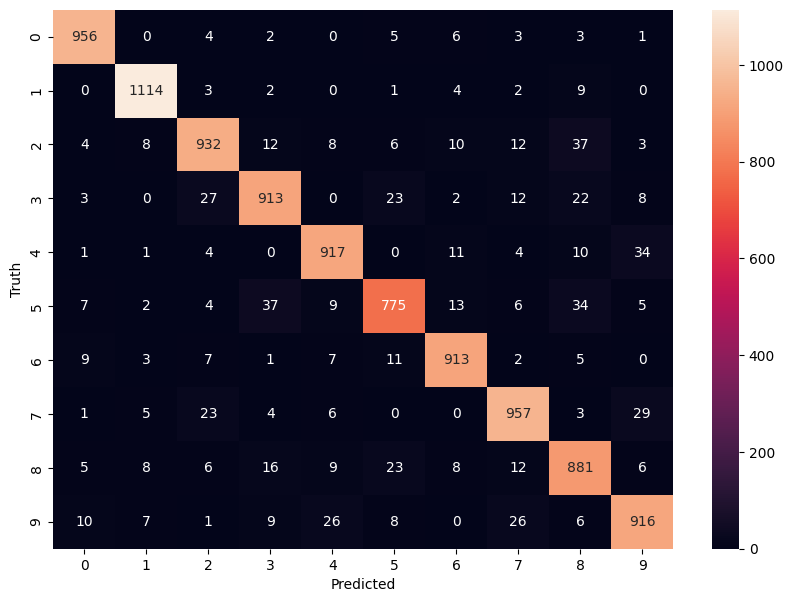

In [90]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [92]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10,  activation='sigmoid')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

model.fit(x_train_flatten,y_train,epochs=5)

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 871us/step - accuracy: 0.8730 - loss: 0.4537
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 892us/step - accuracy: 0.9614 - loss: 0.1320
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9741 - loss: 0.0872
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 980us/step - accuracy: 0.9797 - loss: 0.0660
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 808us/step - accuracy: 0.9836 - loss: 0.0505


In [93]:
model.evaluate(x_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.9729 - loss: 0.0959


[0.08114724606275558, 0.9765999913215637]

Text(95.72222222222221, 0.5, 'Truth')

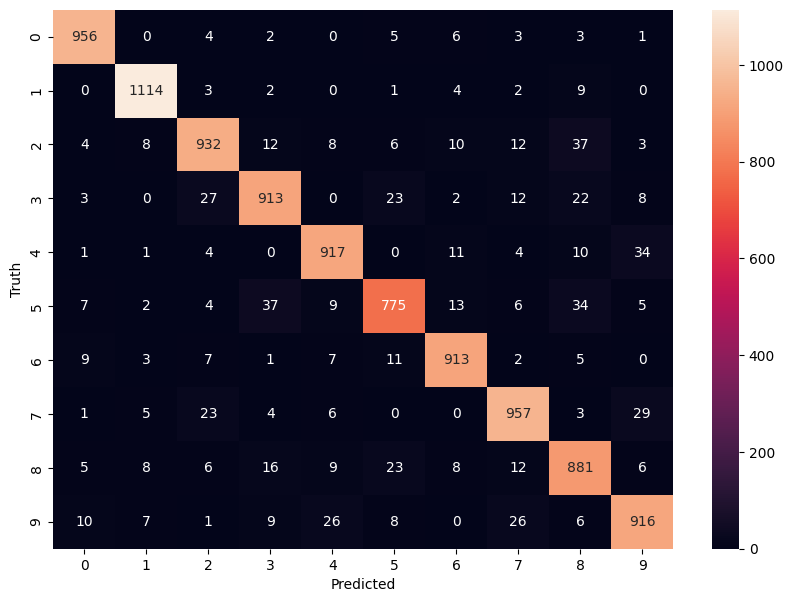

In [94]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [97]:
model = keras.Sequential([
    keras.layers.flatten(input_shape=(28,28)),
    keras.layers.Dense(100,  activation='relu'),
    keras.layers.Dense(10,  activation='sigmoid')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

model.fit(x_train,y_train,epochs=5)

AttributeError: module 'keras._tf_keras.keras.layers' has no attribute 'flatten'